# Collective Quantum Exhaustive Search Experiments
These are defiend by the instructions in an email from 13.2.24 from IA to DM and TM.

## Used external notebooks

In [2]:
from ipynb.fs.full.ansatz import get_twolocal

### Imports

In [3]:
from qiskit.quantum_info import SparsePauliOp
import networkx as nx
import random

from hamiltonians import gen_trans_ising_op, get_exact_ground, gen_maxcut_op, gen_maxcut_op_from_graph
from experiment_utils import *

random.seed(7)

## Two-qubit experiments
These experiments are run on two types of examples:
-   Molecular Hamiltonians: H2 and HeH.
-   Transverse-Field Ising Model Hamiltonians.

For these, we will present:
-   The energy landscape sampled using all MUB states (without an appended ansatz).
-   VQE execution from the best 10 MUB states as initial points (awaiting Dekel's code to do this).

### Hamiltonian Generation

In [4]:
H2_ham_0_75 = SparsePauliOp(data= ['II', 'IZ', 'ZI', 'ZZ', 'XX'],
coeffs= [-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,  0.18206025+0.j])

HeH_ham_1 = SparsePauliOp(data= ['II', 'IZ', 'IX', 'ZI', 'XI', 'ZZ', 'ZX', 'XZ', 'XX'],
coeffs= [-3.04506092+0.j,  0.50258052+0.j,  0.11926278+0.j, -0.50258052+0.j, 0.11926278+0.j, -0.13894646+0.j, -0.11926145+0.j,  0.11926145+0.j,  0.11714671+0.j])

molecular_hams = [H2_ham_0_75, HeH_ham_1]
molecular_descs = ["LiH, 0.75A, 2 qubits", "HeH, 1A, 2 qubits"]

transverse_hams = [gen_trans_ising_op(2, random.uniform(0,1), random.uniform(0,1)) for _ in range(2)]

### Calculate Landscape

===Calculating Molecular Landscapes===
attempting all MUB states over the operator SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,
  0.18206025+0.j])
Energy Landscape:


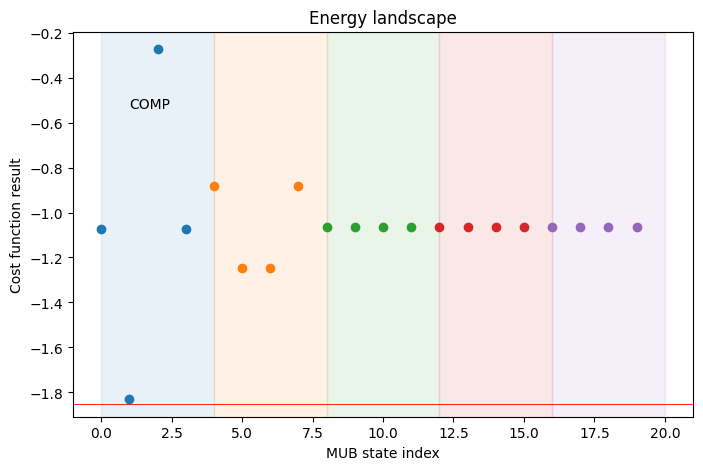

Energy Histogram:


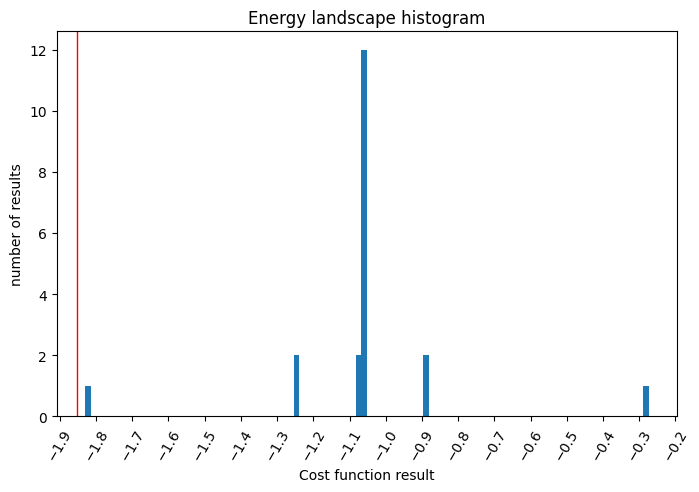

attempting all MUB states over the operator SparsePauliOp(['II', 'IZ', 'IX', 'ZI', 'XI', 'ZZ', 'ZX', 'XZ', 'XX'],
              coeffs=[-3.04506092+0.j,  0.50258052+0.j,  0.11926278+0.j, -0.50258052+0.j,
  0.11926278+0.j, -0.13894646+0.j, -0.11926145+0.j,  0.11926145+0.j,
  0.11714671+0.j])
Energy Landscape:


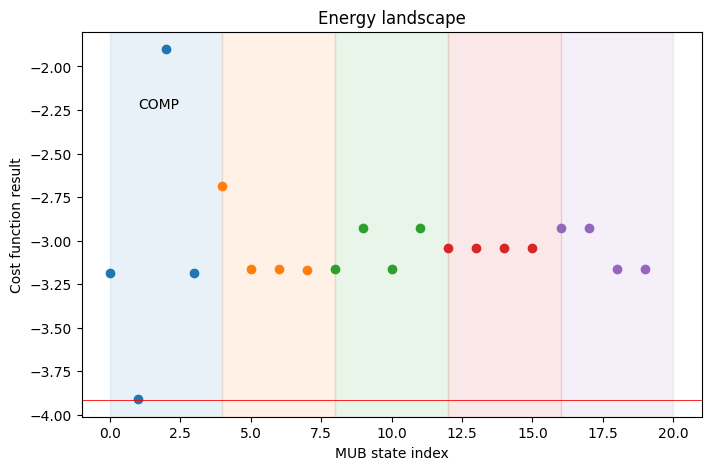

Energy Histogram:


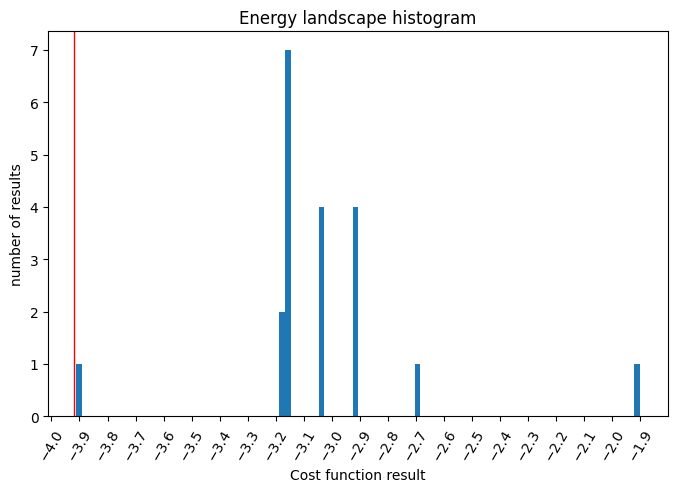

===Calculating Transverse Ising Landscapes===
attempting all MUB states over the operator SparsePauliOp(['ZZ', 'XI', 'IX'],
              coeffs=[0.32383276+0.j, 0.15084917+0.j, 0.15084917+0.j])
Energy Landscape:


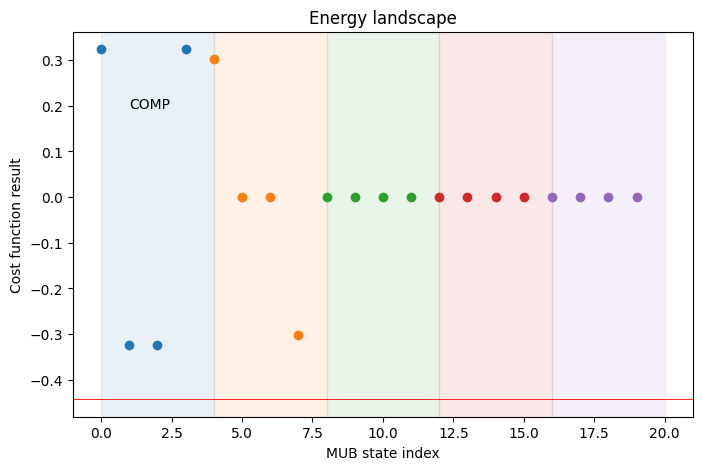

Energy Histogram:


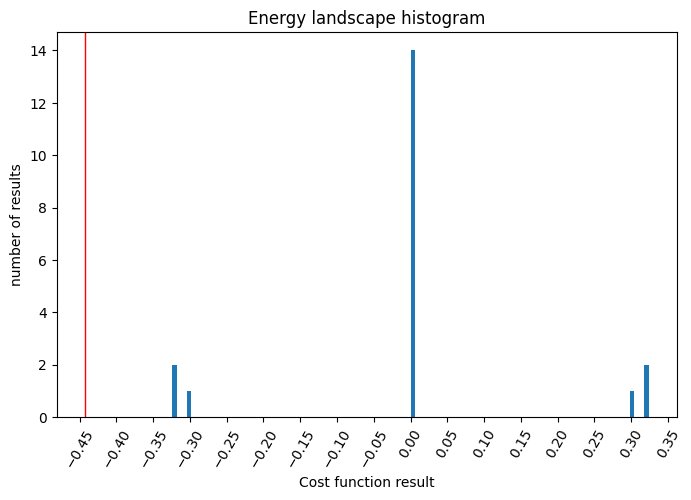

attempting all MUB states over the operator SparsePauliOp(['ZZ', 'XI', 'IX'],
              coeffs=[0.65093447+0.j, 0.07243629+0.j, 0.07243629+0.j])
Energy Landscape:


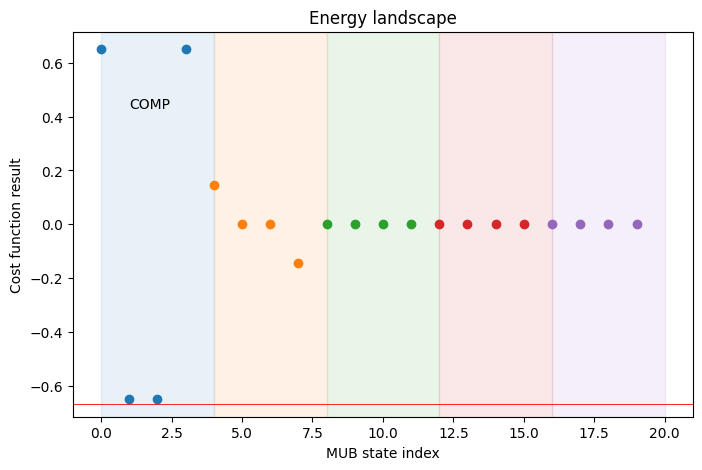

Energy Histogram:


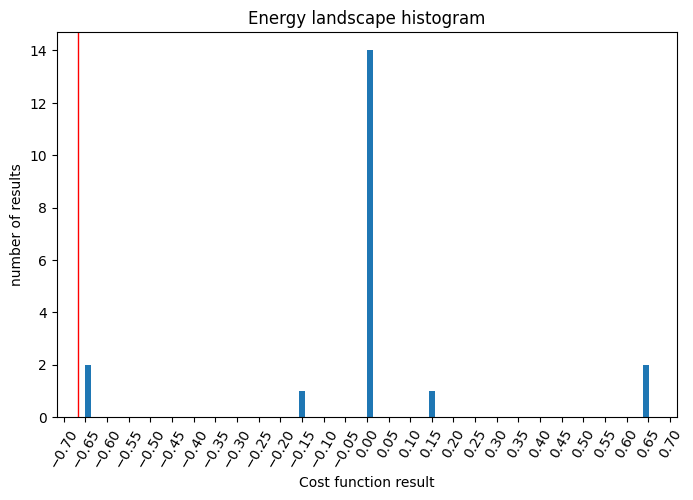

In [5]:
print("===Calculating Molecular Landscapes===")
molecular_landscapes = run_and_record_landscape_list(molecular_hams, n_mub_qubits=2)
print("===Calculating Transverse Ising Landscapes===")
transverse_landscapes = run_and_record_landscape_list(transverse_hams, n_mub_qubits=2)


### VQE Execution

In [6]:
run_and_record_vqe_expressive_2q_list(molecular_landscapes)
run_and_record_vqe_expressive_2q_list(transverse_landscapes)

The operator SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,
  0.18206025+0.j]) has the exact value -1.851311285646772.
Now trying to reach the vcalue from different MUB points.


NameError: name 'params_MUB_2q' is not defined

## Three-qubit experiments
These experiments are run on two types of examples:
-   Hamiltonian reductions of MAXCUT problem instances.
-   Transverse-Field Ising Model Hamiltonians.

For these, we will present:
-   The energy landscape sampled using all MUB states, with an appended ansatz.
-   VQE execution from the best 10 MUB+ansatz states as initial points.

### Hamiltonian Generation

In [55]:
n_qubits = 3
n_mub_qubits = 3
edges_options =[[(0,1), (1,2), (2,0)],
    [(0,1), (1,2)]]
maxcut_hams = [gen_maxcut_op(n_qubits, edges) for edges in edges_options]
maxcut_exact_results = [get_exact_ground(op) for op in maxcut_hams]

TRANSVERSE_OPS = 3
zz_coeffs = [random.uniform(0,1) for _ in range(TRANSVERSE_OPS)]
x_coeffs = [random.uniform(0,1) for _ in range(TRANSVERSE_OPS)]
transverse_hams = [gen_trans_ising_op(n_qubits, zz_coeff, x_coeff) for zz_coeff, x_coeff in zip(zz_coeffs, x_coeffs)]
transverse_exact_results = [get_exact_ground(op) for op in transverse_hams]
ansatz = get_twolocal(n_qubits, n_qubits)

### Calculate Landscape

In [ ]:

print("===Calculating Maxcut Landscapes===")
maxcut_landscapes = run_and_record_landscape_shifted_list(maxcut_hams, n_mub_qubits=3, ansatz=ansatz)
print("===Calculating Transverse Ising Landscapes===")
transverse_landscapes = run_and_record_landscape_shifted_list(transverse_hams, n_mub_qubits=3, ansatz=ansatz)


### VQE Runs

In [ ]:
run_and_record_vqe_shifted_list(maxcut_landscapes, ansatz)
run_and_record_vqe_shifted_list(transverse_landscapes, ansatz)   

## >3 qubit experiments
These experiments are run on two types of examples:
-   Hamiltonian reductions of MAXCUT problem instances.
-   Transverse-Field Ising Model Hamiltonians.

For these, we will present:
-   The energy landscape sampled using all partial-MUB states, with an appended ansatz.
-   VQE execution from the best 10 partial-MUB+ansatz states as initial points.

### Hamiltonian Generation

In [58]:
# half-MUB experiments
n_mub_qubits = 3
n_qubits_list = list(range(4,9))

# Transverse Ising Hamiltonians
zz_coeffs = [random.uniform(0,1) for _ in n_qubits_list]
x_coeffs = [random.uniform(0,1) for _ in n_qubits_list]
transverse_ham_params = zip(n_qubits_list, zz_coeffs, x_coeffs)

transverse_hams = [gen_trans_ising_op(*ham_params) for ham_params in transverse_ham_params]
transverse_exact_results = [get_exact_ground(op) for op in transverse_hams]


# MAXCUT Hamiltonians
rand_graph_4 = nx.gnm_random_graph(4, 5)
rand_graph_5 = nx.gnm_random_graph(5, 9)
rand_graph_6 = nx.gnm_random_graph(6, 12)
rand_graph_7 = nx.gnm_random_graph(7, 12)
rand_graph_8 = nx.gnm_random_graph(8, 14)
graphs = [rand_graph_4, rand_graph_5, rand_graph_6, rand_graph_7, rand_graph_8]
maxcut_hams = [gen_maxcut_op_from_graph(graph) for graph in graphs]
maxcut_exact_results = [get_exact_ground(op) for op in maxcut_hams]

# ansatzes = [TwoLocal(n, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=n, insert_barriers=True).decompose() for n in n_qubits_list]


### Calculate Landscape

===Calculating Transverse Landscapes===
attempting all MUB states over the operator SparsePauliOp(['ZZII', 'IZZI', 'IIZZ', 'XIII', 'IXII', 'IIXI', 'IIIX'],
              coeffs=[0.06985542+0.j, 0.06985542+0.j, 0.06985542+0.j, 0.22323896+0.j,
 0.22323896+0.j, 0.22323896+0.j, 0.22323896+0.j])
Energy Landscape:


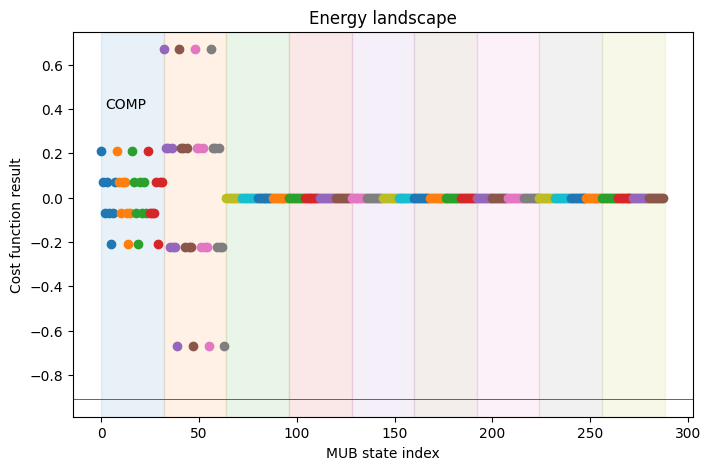

Energy Histogram:


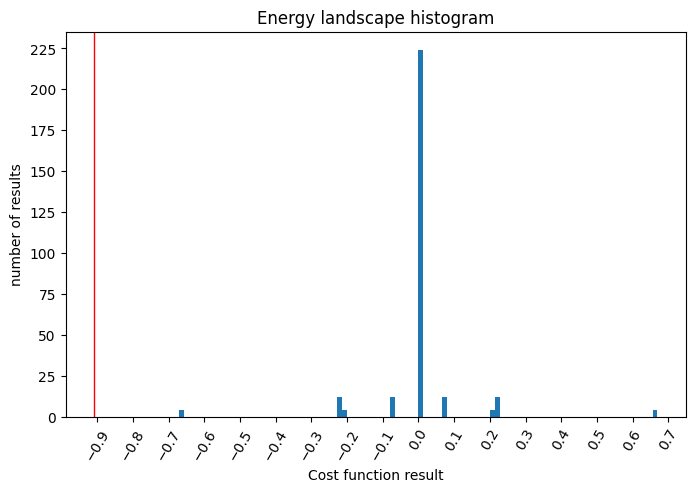

attempting all MUB states over the operator SparsePauliOp(['ZZIII', 'IZZII', 'IIZZI', 'IIIZZ', 'XIIII', 'IXIII', 'IIXII', 'IIIXI', 'IIIIX'],
              coeffs=[0.09071301+0.j, 0.09071301+0.j, 0.09071301+0.j, 0.09071301+0.j,
 0.62743322+0.j, 0.62743322+0.j, 0.62743322+0.j, 0.62743322+0.j,
 0.62743322+0.j])
Energy Landscape:


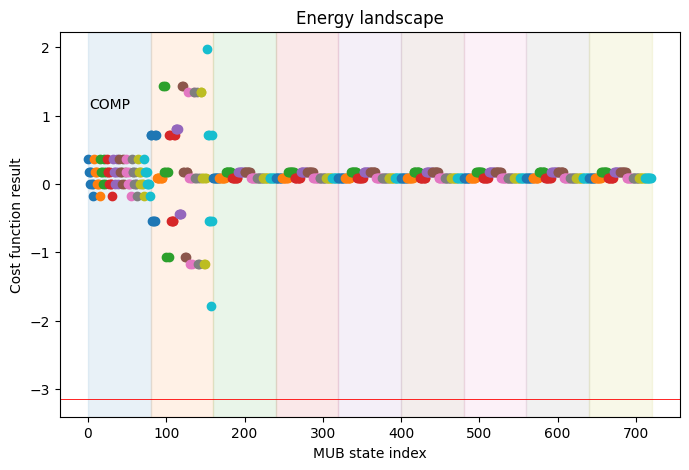

Energy Histogram:


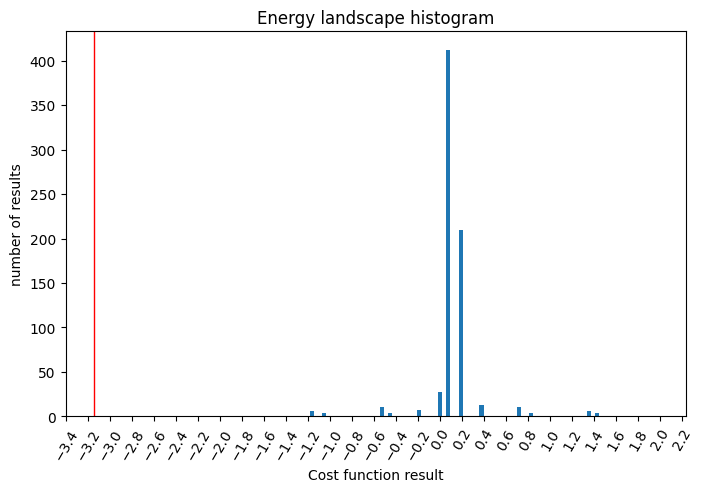

attempting all MUB states over the operator SparsePauliOp(['ZZIIII', 'IZZIII', 'IIZZII', 'IIIZZI', 'IIIIZZ', 'XIIIII', 'IXIIII', 'IIXIII', 'IIIXII', 'IIIIXI', 'IIIIIX'],
              coeffs=[0.42451919+0.j, 0.42451919+0.j, 0.42451919+0.j, 0.42451919+0.j,
 0.42451919+0.j, 0.94770894+0.j, 0.94770894+0.j, 0.94770894+0.j,
 0.94770894+0.j, 0.94770894+0.j, 0.94770894+0.j])
Energy Landscape:


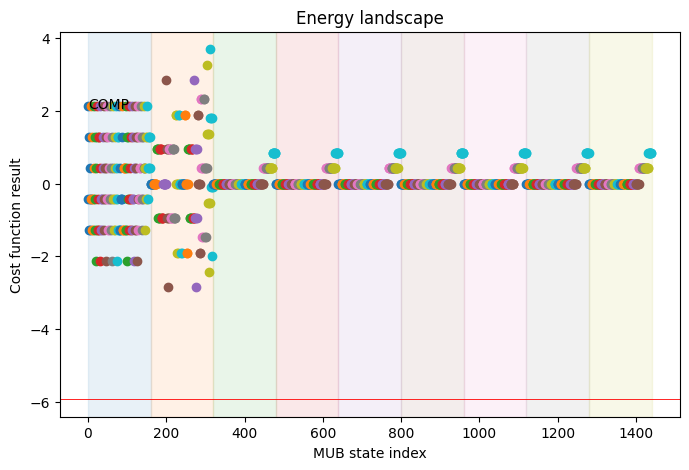

Energy Histogram:


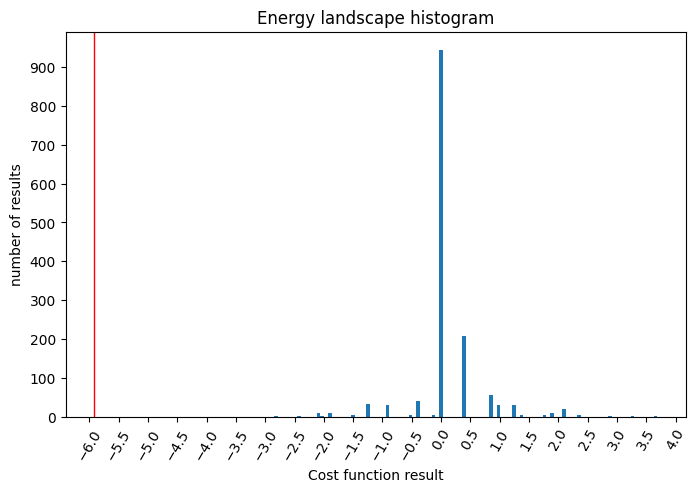

attempting all MUB states over the operator SparsePauliOp(['ZZIIIII', 'IZZIIII', 'IIZZIII', 'IIIZZII', 'IIIIZZI', 'IIIIIZZ', 'XIIIIII', 'IXIIIII', 'IIXIIII', 'IIIXIII', 'IIIIXII', 'IIIIIXI', 'IIIIIIX'],
              coeffs=[0.82685212+0.j, 0.82685212+0.j, 0.82685212+0.j, 0.82685212+0.j,
 0.82685212+0.j, 0.82685212+0.j, 0.57710295+0.j, 0.57710295+0.j,
 0.57710295+0.j, 0.57710295+0.j, 0.57710295+0.j, 0.57710295+0.j,
 0.57710295+0.j])
Energy Landscape:


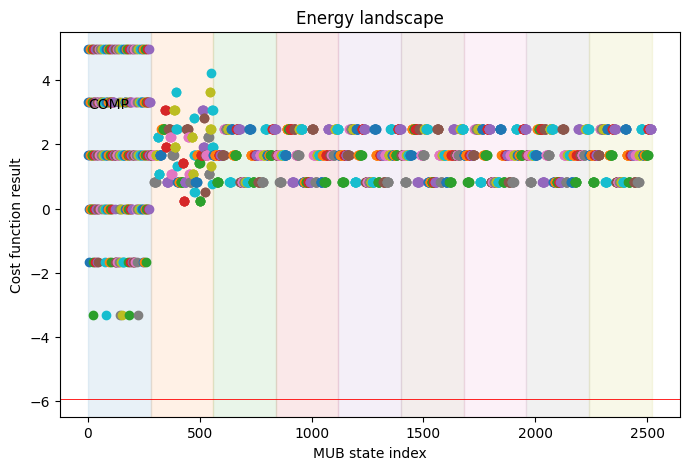

Energy Histogram:


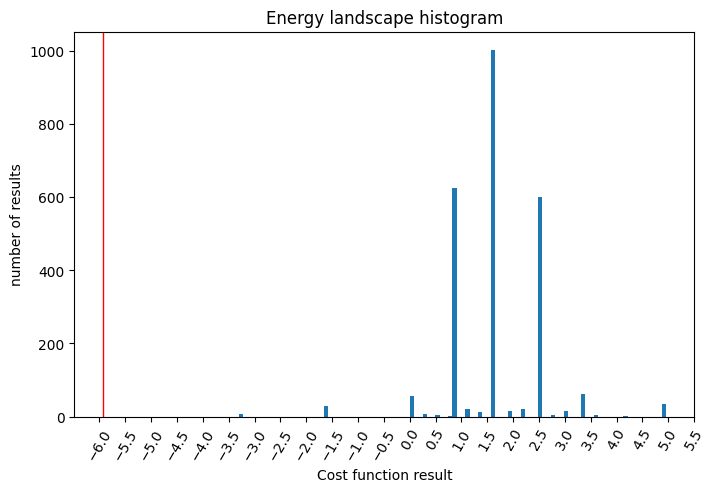

attempting all MUB states over the operator SparsePauliOp(['ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ', 'XIIIIIII', 'IXIIIIII', 'IIXIIIII', 'IIIXIIII', 'IIIIXIII', 'IIIIIXII', 'IIIIIIXI', 'IIIIIIIX'],
              coeffs=[0.12380196+0.j, 0.12380196+0.j, 0.12380196+0.j, 0.12380196+0.j,
 0.12380196+0.j, 0.12380196+0.j, 0.12380196+0.j, 0.39668047+0.j,
 0.39668047+0.j, 0.39668047+0.j, 0.39668047+0.j, 0.39668047+0.j,
 0.39668047+0.j, 0.39668047+0.j, 0.39668047+0.j])
Energy Landscape:


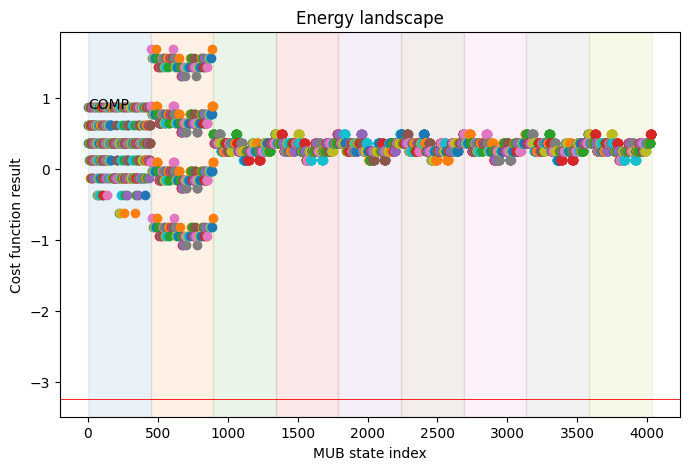

Energy Histogram:


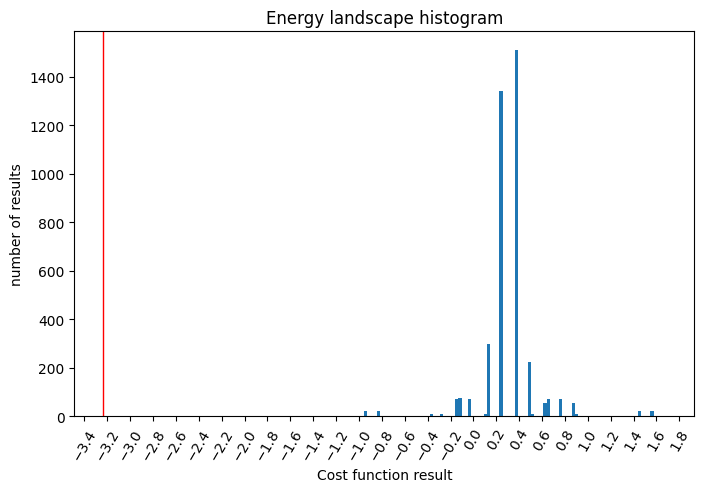

===Calculating Maxcut Landscapes===
attempting all MUB states over the operator SparsePauliOp(['IIZZ', 'IZIZ', 'IZZI', 'ZIZI', 'ZZII', 'IIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -2.5+0.j])
Energy Landscape:


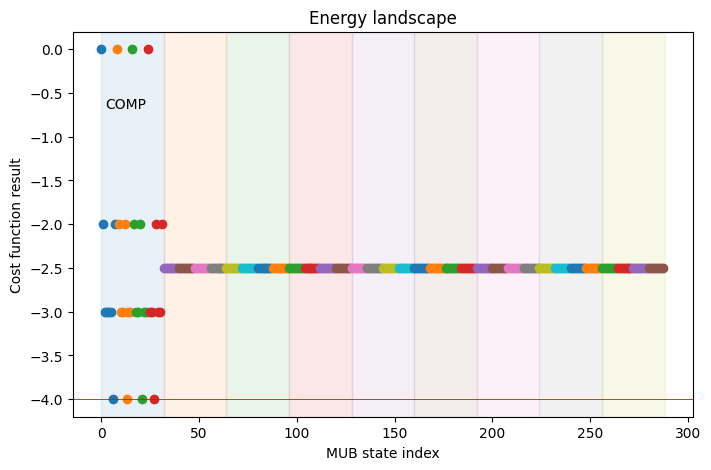

Energy Histogram:


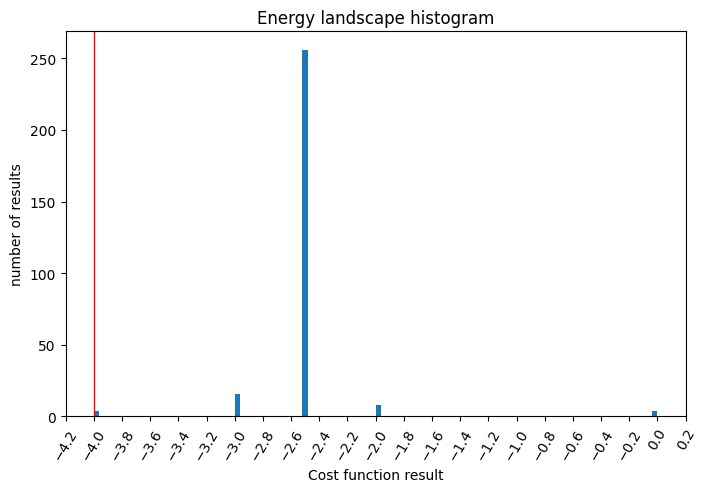

attempting all MUB states over the operator SparsePauliOp(['IIIZZ', 'IIZIZ', 'IZIIZ', 'ZIIIZ', 'IIZZI', 'IZIZI', 'IZZII', 'ZIZII', 'ZZIII', 'IIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j, -4.5+0.j])
Energy Landscape:


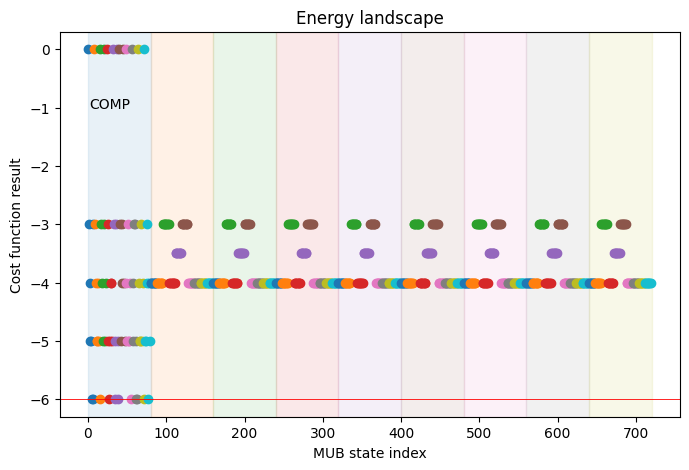

Energy Histogram:


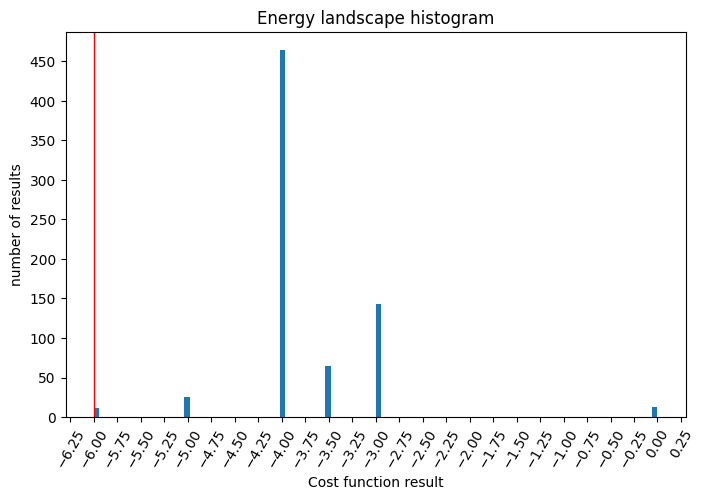

attempting all MUB states over the operator SparsePauliOp(['IIIIZZ', 'IIIZIZ', 'IIZIIZ', 'IZIIIZ', 'IIIZZI', 'IIZIZI', 'IZIIZI', 'IIZZII', 'IZIZII', 'ZIIZII', 'ZIZIII', 'ZZIIII', 'IIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -6. +0.j])
Energy Landscape:


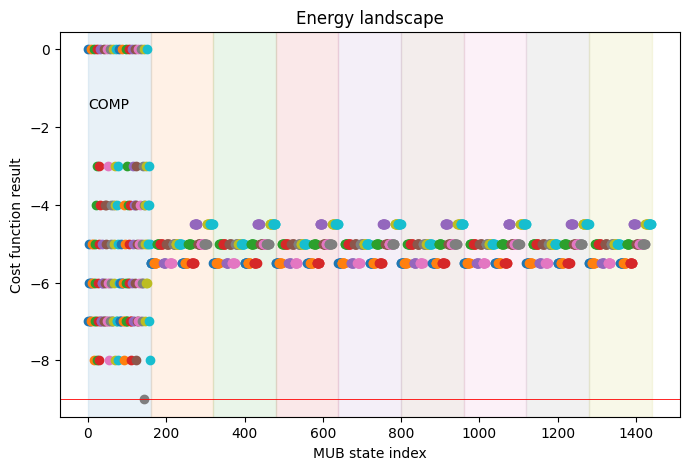

Energy Histogram:


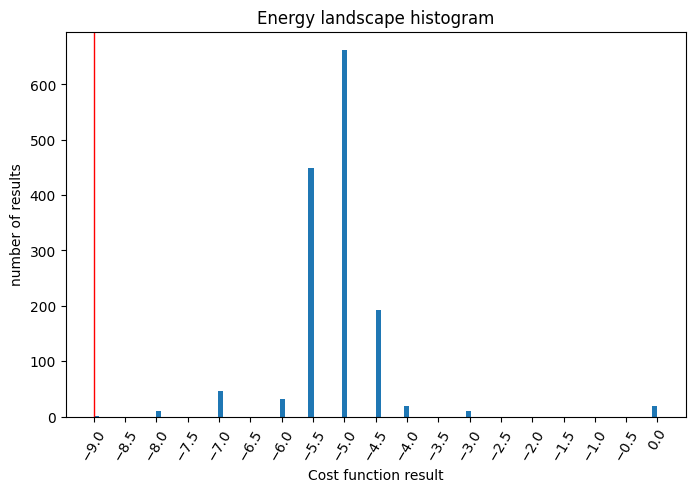

attempting all MUB states over the operator SparsePauliOp(['IIIIIZZ', 'IIZIIIZ', 'IZIIIIZ', 'ZIIIIIZ', 'IIZIIZI', 'IZIIIZI', 'IIIZZII', 'IIZIZII', 'IZIIZII', 'ZIIZIII', 'ZIZIIII', 'ZZIIIII', 'IIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -6. +0.j])
Energy Landscape:


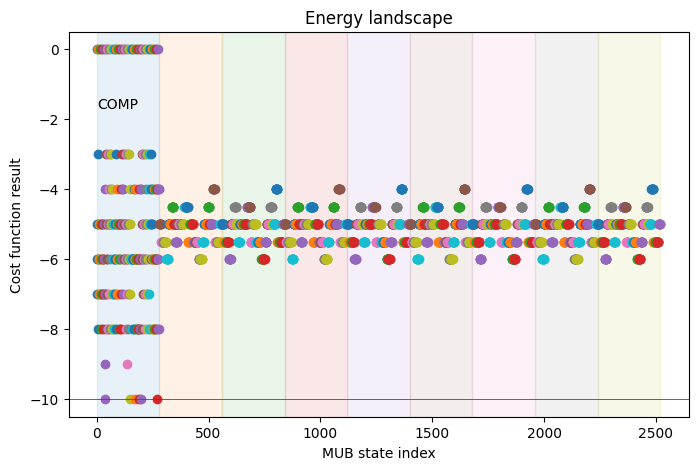

Energy Histogram:


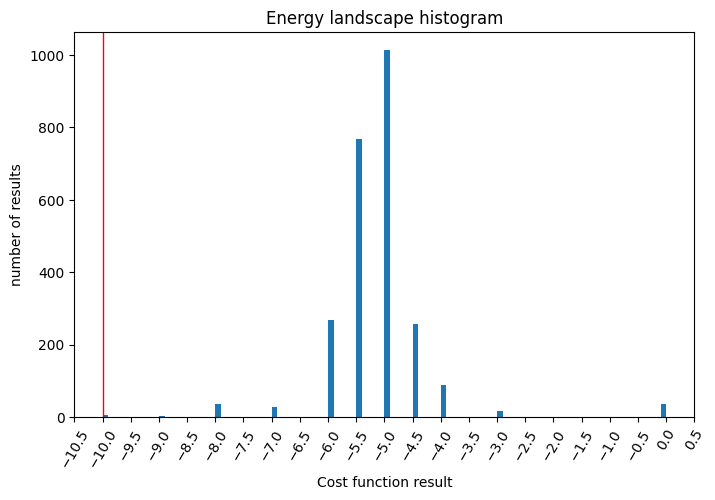

attempting all MUB states over the operator SparsePauliOp(['ZIIIIIIZ', 'IIIIZIZI', 'IZIIIIZI', 'IIZIIZII', 'ZIIIIZII', 'IIIZZIII', 'IIZIZIII', 'IZIIZIII', 'ZIIIZIII', 'IIZZIIII', 'ZIIZIIII', 'IZZIIIII', 'ZIZIIIII', 'ZZIIIIII', 'IIIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
 -7. +0.j])
Energy Landscape:


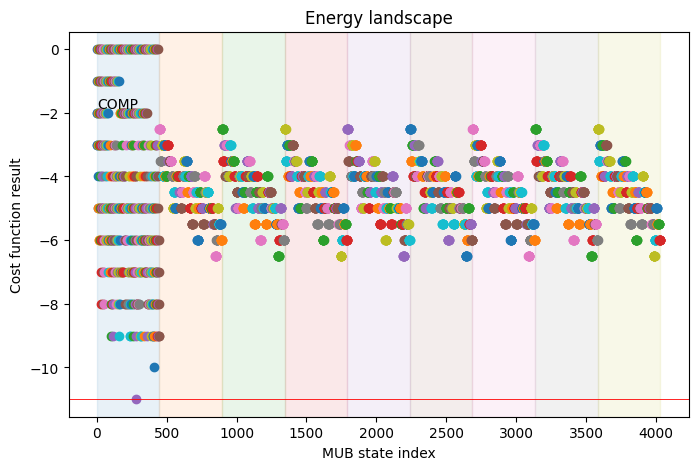

Energy Histogram:


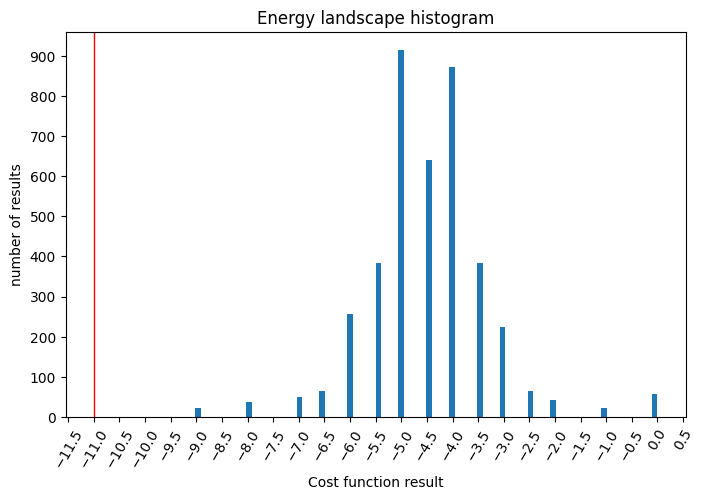

In [59]:
print("===Calculating Transverse Landscapes===")
transverse_landscapes = []
for n_qubits, ham in zip(n_qubits_list, transverse_hams):
    ansatz = get_twolocal(n_qubits, n_qubits)
    transverse_landscapes.append(run_and_record_landscape_shifted(ham, n_mub_qubits, ansatz))

print("===Calculating Maxcut Landscapes===")
maxcut_landscapes = []
for n_qubits, ham in zip(n_qubits_list, maxcut_hams):
    ansatz = get_twolocal(n_qubits, n_qubits)
    maxcut_landscapes.append(run_and_record_landscape_shifted(ham, n_mub_qubits, ansatz))

### VQE Runs

In [ ]:
print("===Performing Transverse-Ising VQE===")
for n_qubits, landscape in zip(n_qubits_list, transverse_landscapes):
    ansatz = get_twolocal(n_qubits, n_qubits)   
    run_and_record_vqe_shifted(landscape, ansatz)


print("===Performing MAXCUT VQE===")
for n_qubits, landscape in zip(n_qubits_list, maxcut_landscapes):
    ansatz = get_twolocal(n_qubits, n_qubits)
    run_and_record_vqe_shifted(landscape, ansatz)